In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

sns.__version__

'0.13.0'

In [500]:
import os
for dir_name, _, file_names in os.walk("input"):
    for file_name in file_names:
        print(os.path.join(dir_name, file_name))


input/.DS_Store
input/test.csv
input/train.csv
input/gender_submission.csv


In [501]:
train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")


In [502]:
survived_label = train_df["Survived"]

trainAndTest_df = pd.concat([train_df, test_df], ignore_index=True)

print(train_df.shape)
print(trainAndTest_df.shape)


(891, 12)
(1309, 12)


In [503]:
# train_df.describe()
# train_df.isna().sum()
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [504]:
sns.set(style = "whitegrid")


In [505]:
def sexToNum(sex):
    if sex == "male":
        return 1
    return 0
        
train_df["SexNum"] = train_df["Sex"].apply(sexToNum)

/var/folders/qf/4nf8g8b54y5fcp3949xhmn600000gn/T/ipykernel_12170/3795848063.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(
/var/folders/qf/4nf8g8b54y5fcp3949xhmn600000gn/T/ipykernel_12170/3795848063.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(
/var/folders/qf/4nf8g8b54y5fcp3949xhmn600000gn/T/ipykernel_12170/3795848063.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(
/var/folders/qf/4nf8g8b54y5fcp3949xhmn600000gn/T/ipykernel_12170/3795848063.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(
/var/folders/qf/4nf8g8b54y5fcp3949xhmn600000gn/T/ipykernel_12170/3795848063.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(
/var/folders/qf

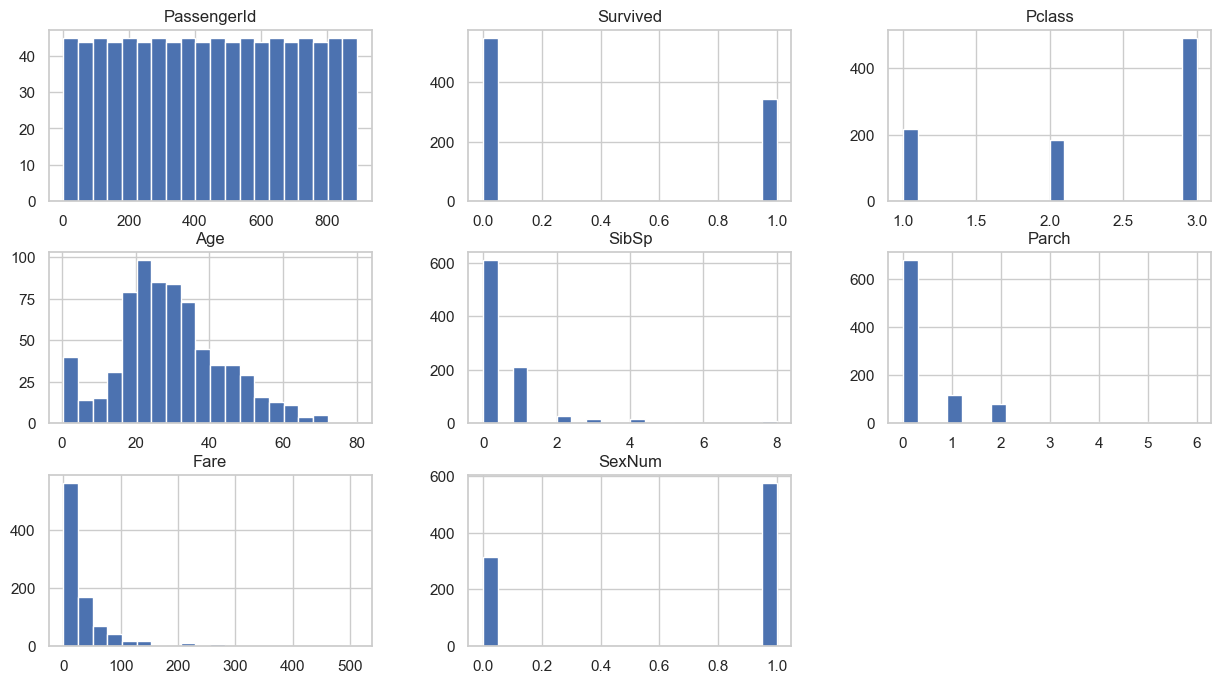

In [506]:
# distribution
numerical_col = train_df.select_dtypes(include=["int64", "float64"])

fig, ax = plt.subplots(2, 4, figsize=(15, 8))

for i, col in enumerate(numerical_col):
    axes = ax[i//4, i%4]
    train_df.hist(
        bins = 20,
        edgecolor = "white",
        ax = axes
    )

# plt.tight_layout()
plt.show()

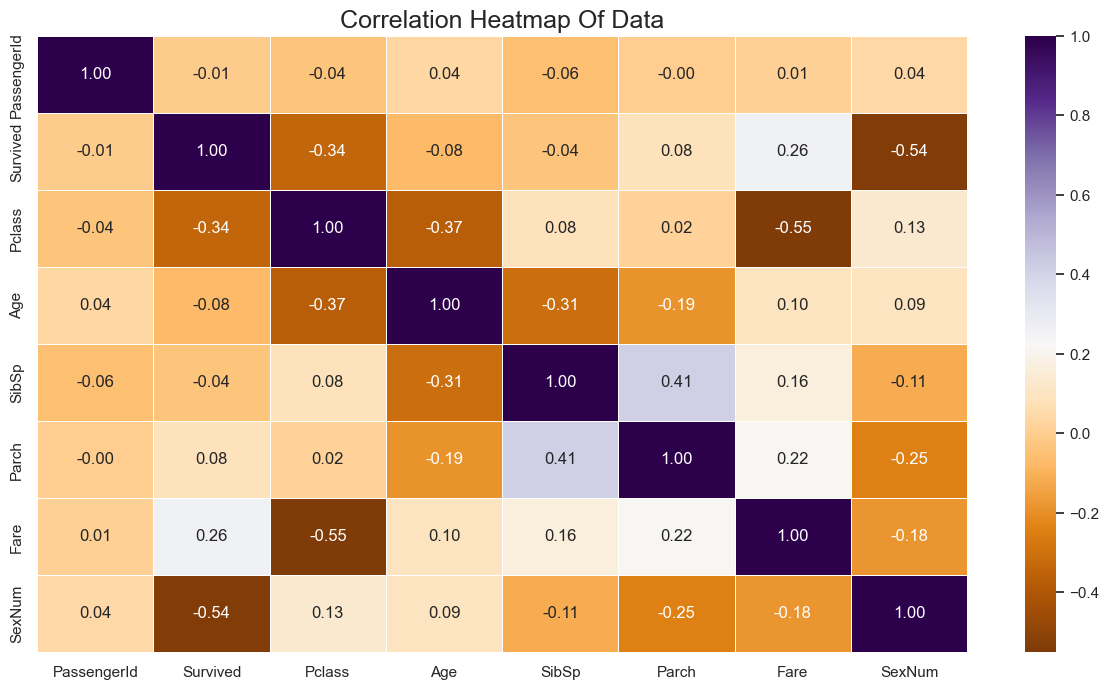

In [507]:
# correlation heapmap
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("Correlation heatmap of data".title(),fontsize=18)

sns.heatmap(
    numerical_col.corr(),
    cmap = "PuOr",
    fmt = ".2f",
    linewidth = 0.5,
    annot=True
)

plt.show()

In [508]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexNum
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


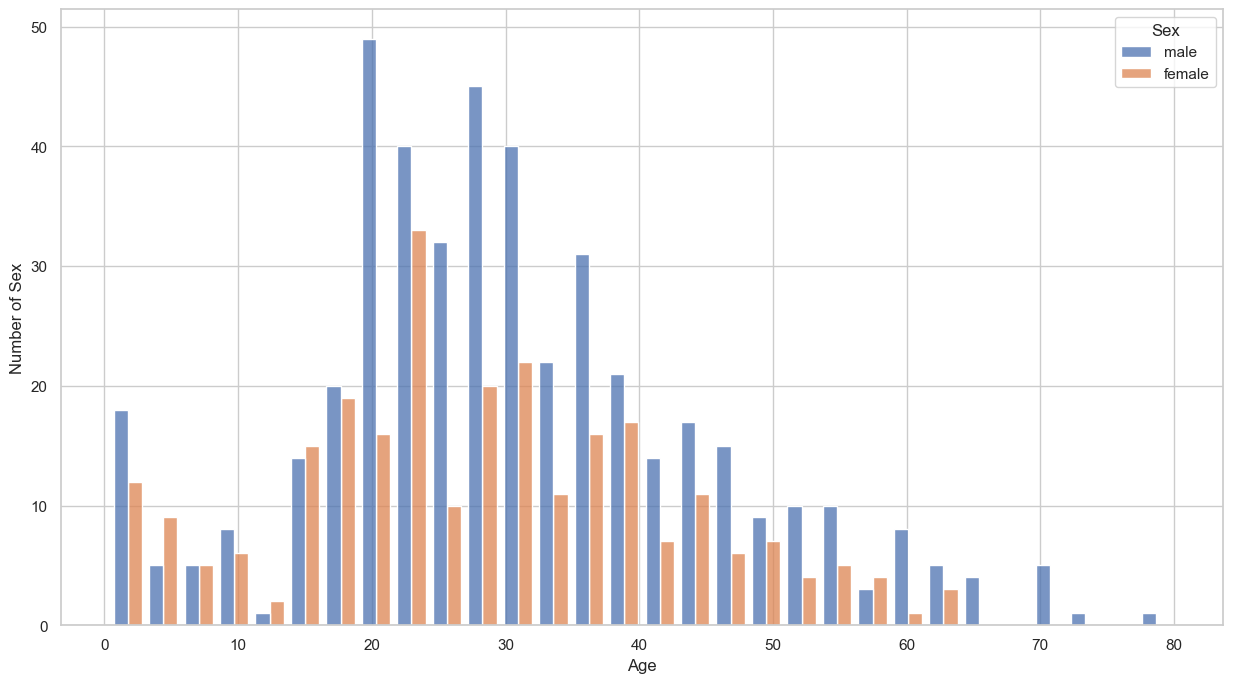

In [509]:
# population composition
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(
    data = train_df,
    x = "Age",
    hue = "Sex",
    multiple = "dodge",
    shrink = .8,
    bins = 30,
    color = ["b", "r"],
    ax = ax
)

plt.xlabel("Age")
plt.ylabel("Number of Sex")
plt.show()

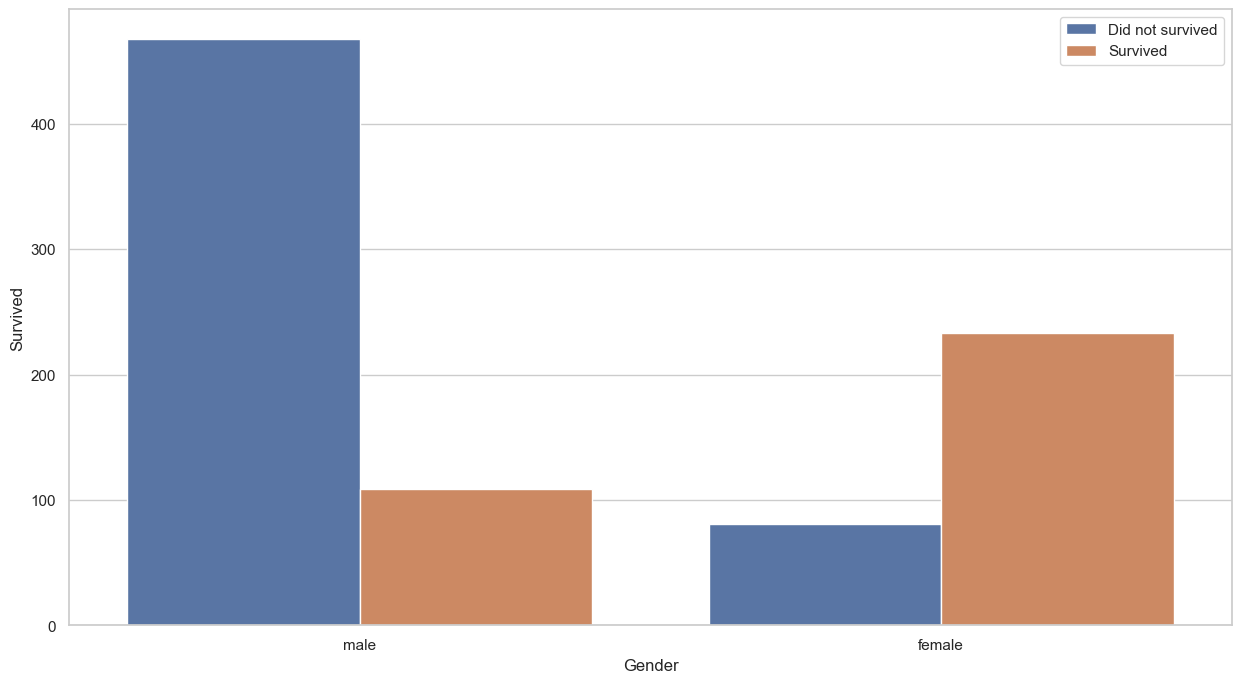

In [510]:
# Survived rate by Gender
fig, ax = plt.subplots(figsize=(15, 8))

sns.countplot(
    data = train_df,
    x = "Sex",
    hue = "Survived",
    ax = ax
)
ax.set_ylabel("Survived")
ax.set_xlabel("Gender")
ax.legend(["Did not survived", "Survived"])


In [511]:
train_df[["Survived", "Sex"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived")

,Sex,Survived
1,male,0.188908
0,female,0.742038


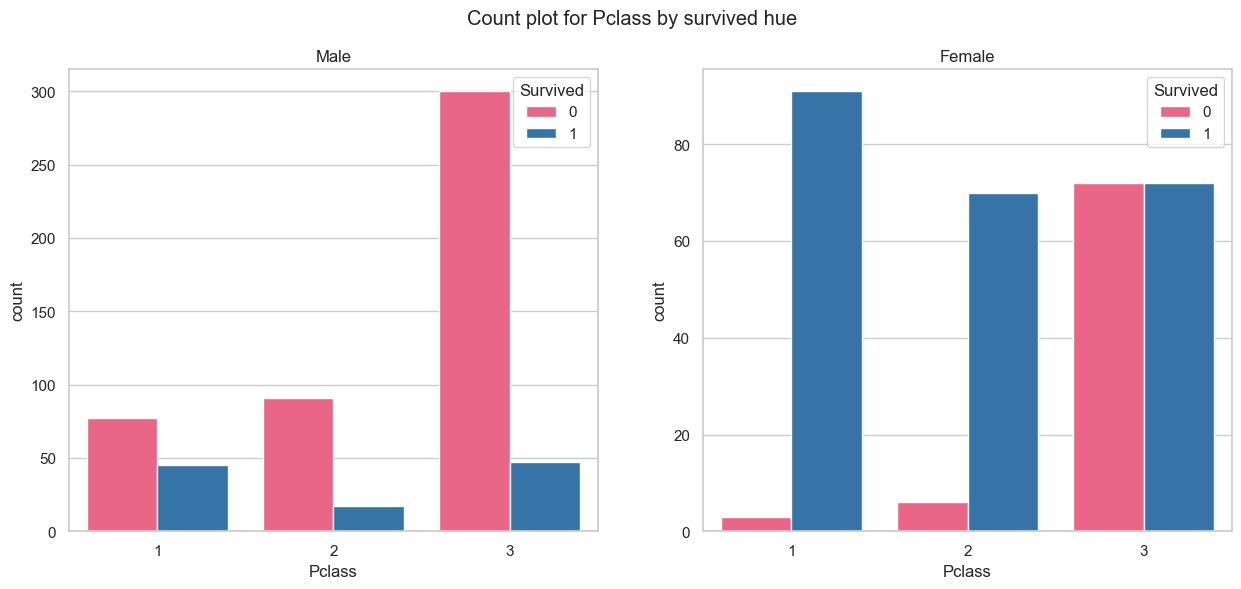

In [512]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for i, sex in enumerate(["male", "female"]):
    sns.countplot(
        data = train_df[train_df["Sex"] == sex],
        x = "Pclass",
        hue = "Survived",
        palette = ["#ff507b", "#2374ba"],
        ax = ax[i]
    )

    ax[i].set_title(sex.title())

fig.suptitle("Count plot for Pclass by survived hue")

plt.show()

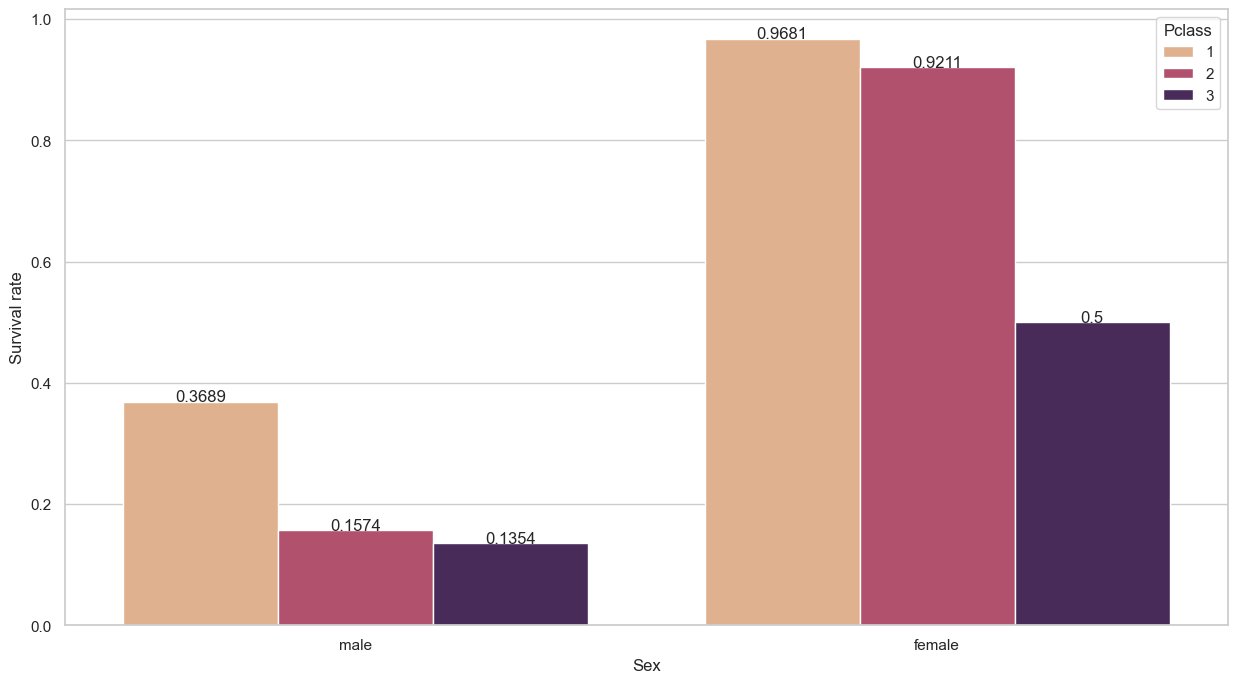

In [513]:
train_df[["Survived", "Pclass", "Sex"]].groupby(["Pclass", "Sex"], as_index=False).mean().sort_values(by="Survived")

fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(
    data = train_df,
    x = "Sex",
    y = "Survived",
    hue = "Pclass",
    errorbar = None,
    palette = sns.color_palette(
        "flare", 
        as_cmap = True
    ),
    ax = ax
)

for p in ax.patches:
    #! don't know why there have 9 data in ax.patches not 6
    if p.get_height() == 0:
        break

    ax.annotate(
        f"{round(p.get_height(), 4)}",
        xy = (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = "center"
    )

ax.set_ylabel("Survival rate")

plt.show()

In [514]:
# create new "AgeGroup" column by categorizing ages
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)

age_bins = [-1, 0, 5, 12, 18, 24, 35, 60, 100]
age_labels = ["Unknow", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Senior"]

train_df["AgeGroup"] = pd.cut(
    train_df["Age"], 
    bins=age_bins, 
    labels=age_labels, 
    include_lowest=True
)

test_df["AgeGroup"] = pd.cut(
    test_df["Age"], 
    bins=age_bins, 
    labels=age_labels, 
    include_lowest=True
)

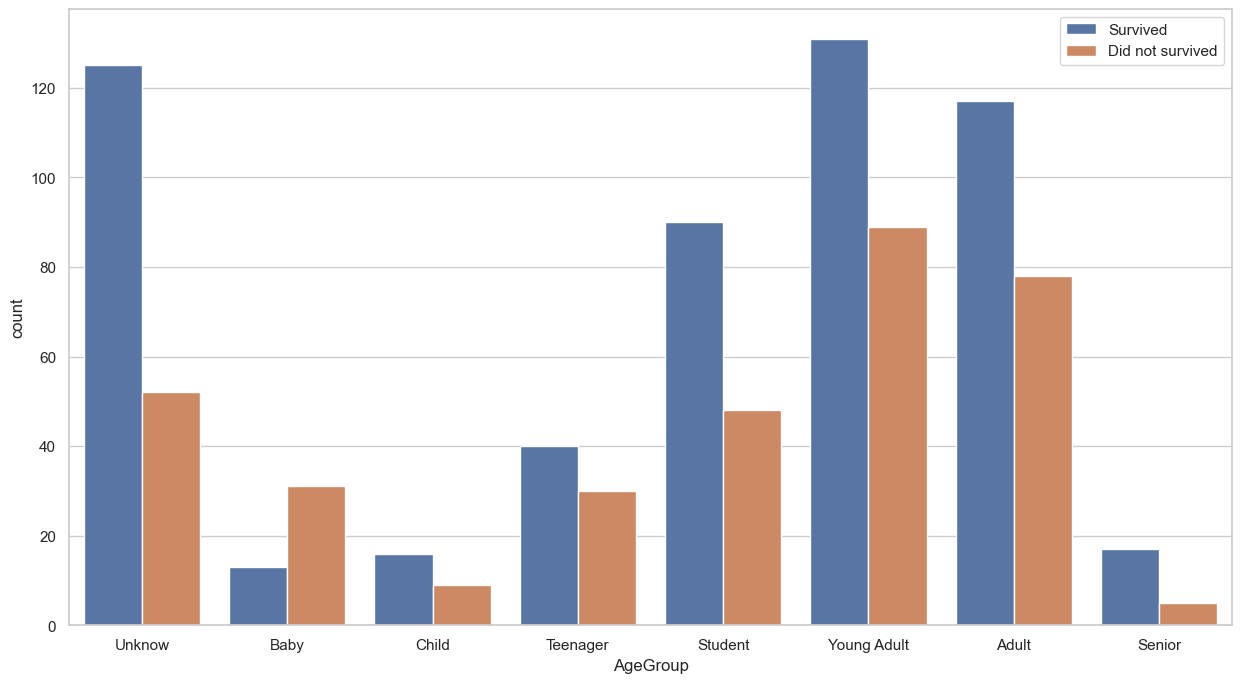

In [515]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.countplot(
    data = train_df,
    x = "AgeGroup",
    hue = "Survived",
    ax = ax
)

ax.legend(["Survived", "Did not survived"])

plt.show()

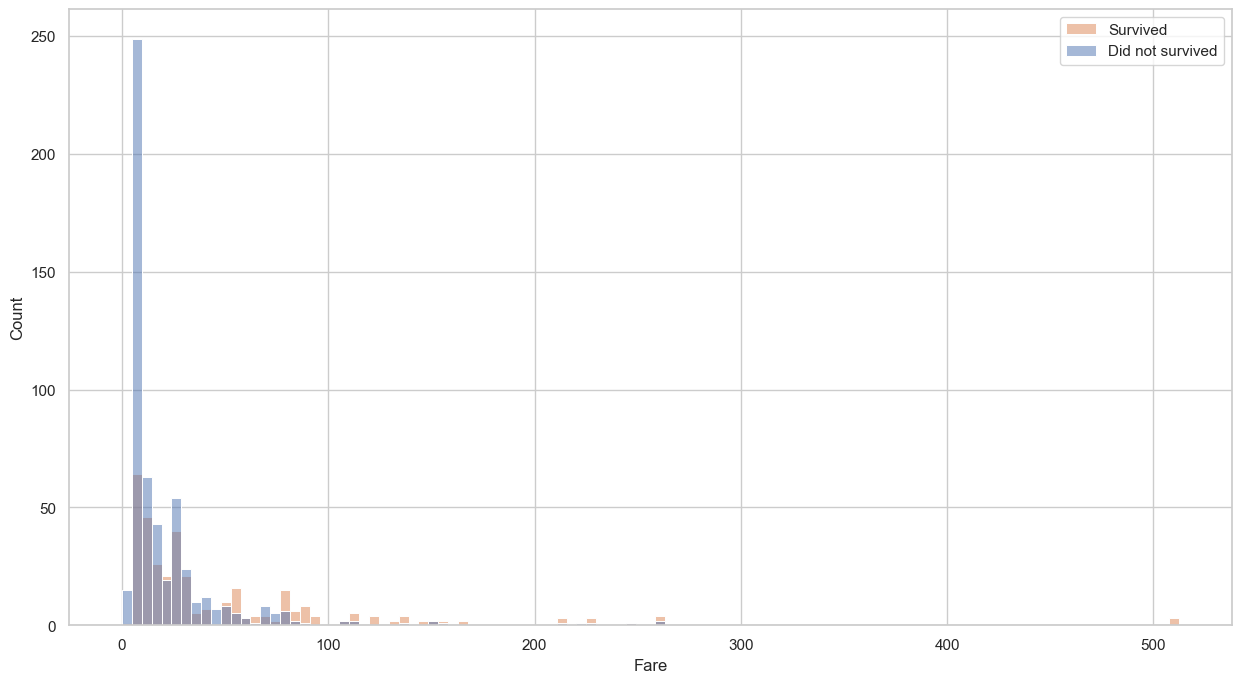

In [516]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.histplot(
    data = train_df,
    x = "Fare",
    hue = "Survived",
    ax = ax
)

ax.legend(["Survived", "Did not survived"])

plt.show()

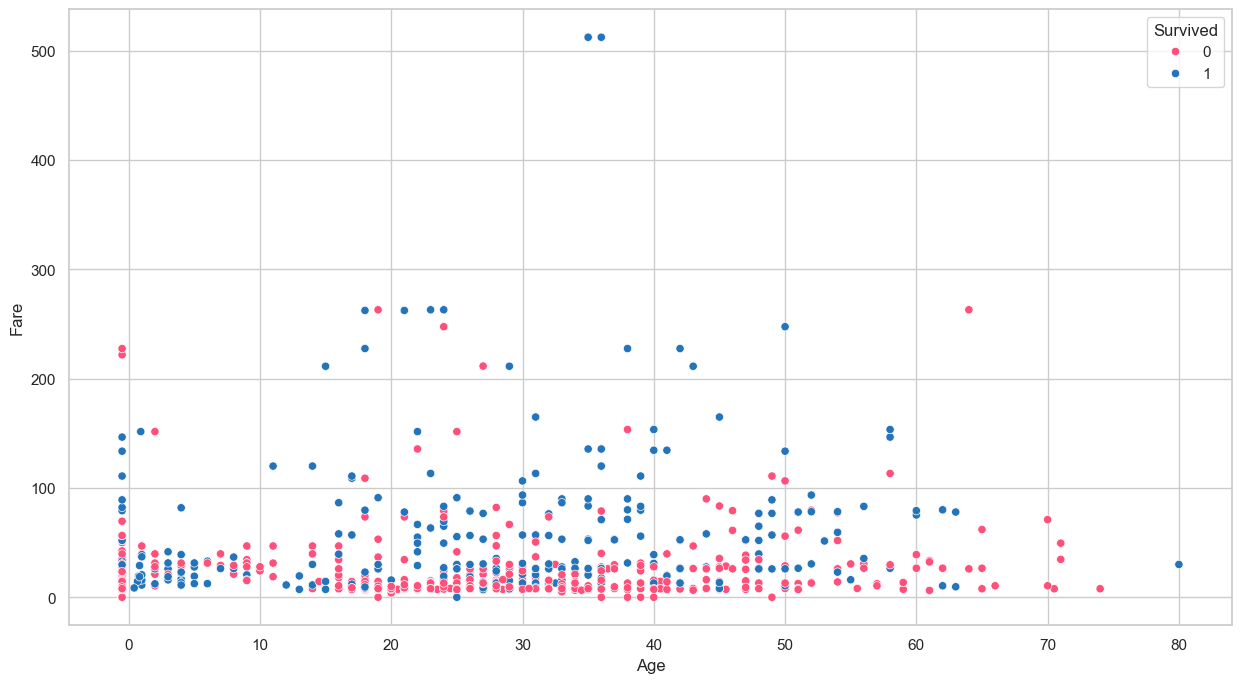

In [517]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(
    data = train_df,
    x = "Age",
    y = "Fare",
    hue = "Survived",
    palette = ["#ff507b", "#2374ba"],
    ax = ax
)

# ax.legend(["Survived", "Did not survived"])
plt.show()

In [518]:
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]

train_df[["Family", "Survived"]].groupby("Family", as_index=False).mean().sort_values(by="Survived")

,Family,Survived
7,7,0.000000
8,10,0.000000
5,5,0.136364
4,4,0.200000
0,0,0.303538
6,6,0.333333
1,1,0.552795
2,2,0.578431
3,3,0.724138


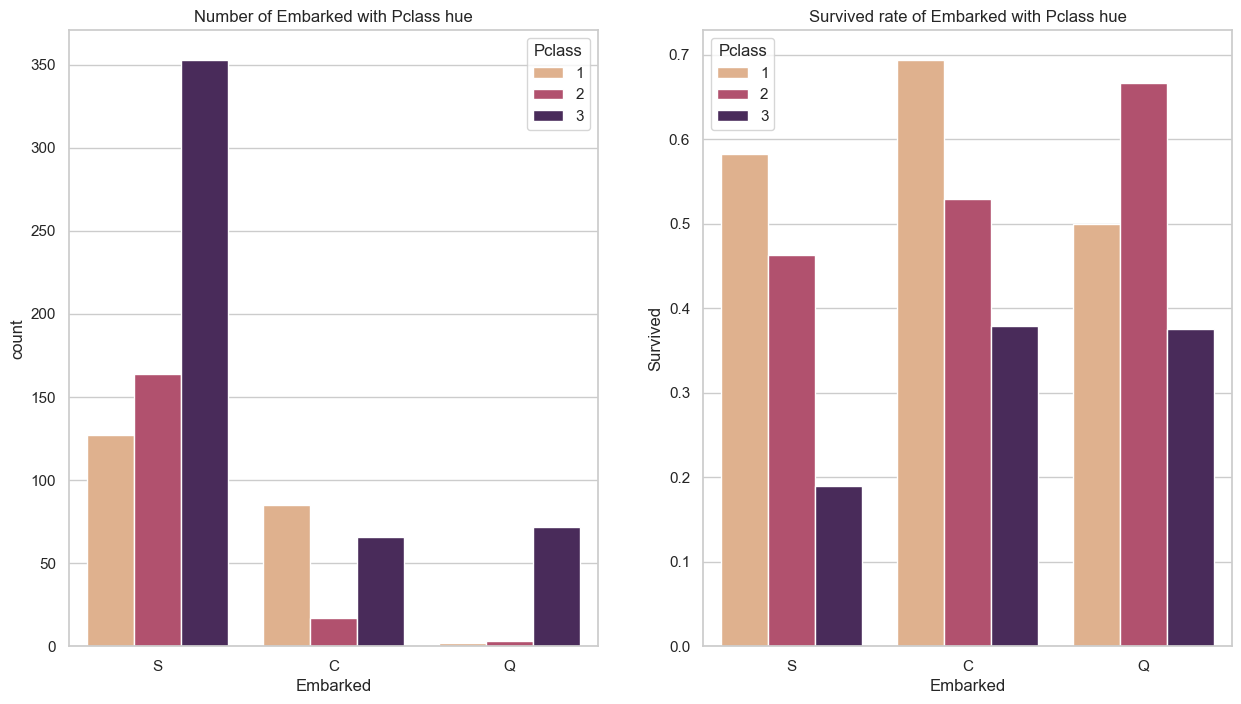

In [519]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.countplot(
    data = train_df,
    x = "Embarked",
    hue = "Pclass",
    palette = sns.color_palette(
        "flare", 
        as_cmap = True
    ),
    ax = ax[0]
)
ax[0].set_title("Number of Embarked with Pclass hue")

sns.barplot(
    data = train_df,
    x = "Embarked",
    y = "Survived",
    hue = "Pclass",
    errorbar = None,
    palette = sns.color_palette(
        "flare", 
        as_cmap = True
    ),
    ax = ax[1]
)
ax[1].set_title("Survived rate of Embarked with Pclass hue")

plt.show()

In [520]:
trainAndTest_df["Family"] = trainAndTest_df["SibSp"] + trainAndTest_df["Parch"]
trainAndTest_df.drop("SibSp", inplace=True, axis=1)
trainAndTest_df.drop("Parch", inplace=True, axis=1)

In [521]:
titles = ["Mr.", "Sir.", "Dr.", "Major.", "Master.", "Ms.", "Miss.", "Mrs.", "Lady."]

for title in titles:
    count = train_df[train_df["Name"].str.contains(title)]["Name"].count()
    age_mean   = train_df[train_df["Name"].str.contains(title)]["Age"].mean()
    age_median = train_df[train_df["Name"].str.contains(title)]["Age"].median()

    num_of_dead = train_df[(train_df["Name"].str.contains(title)) & (train_df["Survived"] == 0)]["Age"].count()

    print(f"title {title}".ljust(15, " ") + f" have {count},".ljust(10, " ") + f" mean = {round(age_mean, 1)}, median = {age_median}, dead = {num_of_dead}, survived = {count-num_of_dead}")

title Mr.       have 647, mean = 26.1, median = 27.0, dead = 463, survived = 184
title Sir.      have 3,   mean = 23.5, median = 22.0, dead = 2, survived = 1
title Dr.       have 11,  mean = 32.2, median = 34.0, dead = 5, survived = 6
title Major.    have 2,   mean = 48.5, median = 48.5, dead = 1, survived = 1
title Master.   have 40,  mean = 4.1, median = 3.0, dead = 17, survived = 23
title Ms.       have 1,   mean = 28.0, median = 28.0, dead = 0, survived = 1
title Miss.     have 182, mean = 17.4, median = 18.0, dead = 55, survived = 127
title Mrs.      have 129, mean = 30.9, median = 32.0, dead = 27, survived = 102
title Lady.     have 1,   mean = 48.0, median = 48.0, dead = 0, survived = 1


In [530]:
# fill Age
for title in titles:
    mask = (trainAndTest_df["Age"].isnull()) & (trainAndTest_df["Name"].str.contains(title))
    trainAndTest_df.loc[mask, "Age"] = trainAndTest_df.loc[mask, "Age"].fillna(train_df[train_df["Name"].str.contains(title)]["Age"].median())

In [523]:
trainAndTest_df["Fare"].fillna(trainAndTest_df["Fare"].median(), inplace=True)

In [524]:
trainAndTest_df["Embarked"].fillna("S", inplace=True)

In [525]:
def fill_Carbin():
    trainAndTest_df["Cabin"].fillna("-", inplace=True)

    mask = (trainAndTest_df["Survived"]==0.0) & (trainAndTest_df["Cabin"]=="-")
    trainAndTest_df.loc[mask, "Cabin"] = "G"

    mask = (trainAndTest_df["Survived"]==1.0) & (trainAndTest_df["Cabin"]=="-")
    trainAndTest_df.loc[mask, "Cabin"] = "B"

    mask = (trainAndTest_df["Survived"].isnull()) & (trainAndTest_df["Cabin"]=="-") & (trainAndTest_df["Pclass"]==1)
    trainAndTest_df.loc[mask, "Cabin"] = "B"

    mask = (trainAndTest_df["Survived"].isnull()) & (trainAndTest_df["Cabin"]=="-") & (trainAndTest_df["Pclass"]==2)
    trainAndTest_df.loc[mask, "Cabin"] = "F"

    mask = (trainAndTest_df["Survived"].isnull()) & (trainAndTest_df["Cabin"]=="-") & (trainAndTest_df["Pclass"]==3)
    trainAndTest_df.loc[mask, "Cabin"] = "G"

fill_Carbin()

In [526]:
def oneHotEncode(df):

    # trainAndTest_df.drop("PassengerId", inplace=True, axis=1)

    df["Sex"] = df["Sex"].map({"male":1,"female":0})

    df["Embarked"] = df["Embarked"].astype("category").cat.codes

    df["Pclass"] = df["Pclass"].astype("category").cat.codes

    df["Cabin"] = df["Cabin"].astype("category").cat.codes

    df["Ticket"] = df["Ticket"].astype("category").cat.codes

oneHotEncode(trainAndTest_df)

In [527]:
# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [531]:
# Define X_test
X_test = trainAndTest_df[891:].drop(columns=['Survived', 'Name']).copy()

In [536]:
predictors = trainAndTest_df[:891].drop(['Name', 'Survived', 'PassengerId'], axis=1)
target = trainAndTest_df[:891]["Survived"]

max_acc_randomforest = 0
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)

randomforest = RandomForestClassifier(random_state=98, n_estimators=120, oob_score=True)
randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_val)

acc_randomforest = round(metrics.accuracy_score(y_pred, y_val) * 100, 2)
print(f"Random Forest Model Accuracy on Validation Set: {acc_randomforest}%")
print(randomforest.oob_score_)


Random Forest Model Accuracy on Validation Set: 97.21%
0.9396067415730337


In [538]:
ids = X_test["PassengerId"]

predictions = randomforest.predict(X_test.drop(['PassengerId'], axis=1))

output = pd.DataFrame({
    "PassengerID": ids,
    "Survived": predictions
})
output.to_csv("result.csv", index=False)

,PassengerID,Survived
count,418.000000,418.00000
mean,1100.500000,0.27512
std,120.810458,0.44711
min,892.000000,0.00000
25%,996.250000,0.00000
50%,1100.500000,0.00000
75%,1204.750000,1.00000
max,1309.000000,1.00000


In [ ]:
# LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = cross_validation.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)

acc_log = metrics.accuracy_score(Y_train, Y_pred)

print (metrics.classification_report(Y_train, Y_pred) )

In [ ]:
# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
svc.predict(x_val)
acc_svc = round(accuracy_score(Y_train, svc.predict(X_train_imputed)) * 100, 2)
print(f"SVM Model Accuracy on Training Set: {acc_svc}%")